<a href="https://colab.research.google.com/github/nasim-aust/Brain-Tumor-Segmentation-using-CNN/blob/master/brain_tumor_segmentation_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from zipfile import ZipFile
file_name="tumor_mri2.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
classifier=Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.2))             

C:\Users\nasim\Anaconda3\envs\workshop\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(output_dim=128, activation='relu'))
#classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

C:\Users\nasim\Anaconda3\envs\workshop\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\nasim\Anaconda3\envs\workshop\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(
         'tumor_mri2/training_set',
          target_size=(64,64),
          batch_size=32,
          class_mode='binary')

test_set=test_datagen.flow_from_directory(
         'tumor_mri2/test_set',
          target_size=(64,64),
          batch_size=32,
          class_mode='binary')



Found 194 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


In [0]:
#from Ipython.display import display
from PIL import Image
history=classifier.fit_generator(
    training_set,
    steps_per_epoch=80,
    epochs=10,
    validation_data=test_set,
    validation_steps=80)



Epoch 1/10
80/80 [==============================] - 9s 112ms/step - loss: 0.3321 - acc: 0.9066 - val_loss: 0.4517 - val_acc: 0.8298
Epoch 2/10
80/80 [==============================] - 9s 115ms/step - loss: 0.2229 - acc: 0.9141 - val_loss: 0.3544 - val_acc: 0.8511
Epoch 3/10
80/80 [==============================] - 9s 118ms/step - loss: 0.1466 - acc: 0.9554 - val_loss: 0.2463 - val_acc: 0.9362
Epoch 4/10
80/80 [==============================] - 9s 116ms/step - loss: 0.1794 - acc: 0.9430 - val_loss: 0.2244 - val_acc: 0.8511
Epoch 5/10
80/80 [==============================] - 9s 116ms/step - loss: 0.1128 - acc: 0.9617 - val_loss: 0.1972 - val_acc: 0.9149
Epoch 6/10
80/80 [==============================] - 10s 119ms/step - loss: 0.0960 - acc: 0.9653 - val_loss: 0.2434 - val_acc: 0.8511
Epoch 7/10
80/80 [==============================] - 9s 116ms/step - loss: 0.1075 - acc: 0.9668 - val_loss: 0.2327 - val_acc: 0.8936
Epoch 8/10
80/80 [==============================] - 10s 120ms/step - loss: 

In [0]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

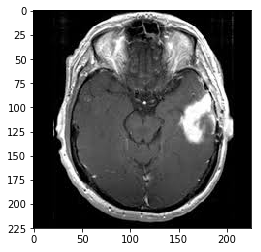

In [0]:
import cv2
import matplotlib.pyplot as plt
#image=cv2.imread('10.jpg')
#F:\python\paper\Thesis\Shishir\tumor_mri2\test_set\class_1
image=cv2.imread('tumor_mri2/test_set/class_1/10.jpg')
plt.imshow(image)
plt.show()

In [0]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('tumor_mri2/test_set/class_1/10.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
training_set.class_indices
if result[0][0]>0.5:
    predict='tumor' 
  
else:
    predict="non tumor"
    
print(predict)    
    
  

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [0]:
#score, acc = classifier.evaluate(training_set,test_set)
#print('Test score:', score)
#print('Test accuracy:', acc)

In [0]:
#classifier.summary()

NameError: name 'history' is not defined

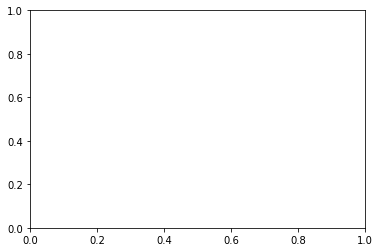

In [0]:
import matplotlib.pyplot as plt

# Accuracy
#print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


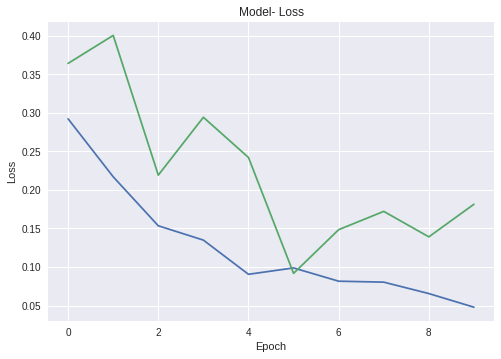

In [0]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()